In [1]:
using Plots
using StatsPlots
using Distributions

maximum(abs.(y .- 1 / n)) = 0.0039000000000000007


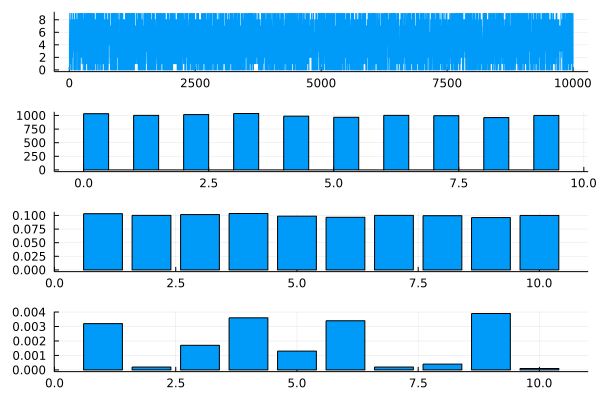

In [2]:
begin
    function wrap(x, n)
        abs(n + x) % n
    end

    n = 10
    num_sample = 1
    T = 10000
    steps = rand([-1, 0, 1, 2, -3, 5], (num_sample, T))
    positions = wrap.(cumsum(steps, dims=2), n)

    fig = plot()
    fig2 = plot()
    for i in 1:num_sample
        plot!(fig, positions[i, :])
        histogram!(fig2, positions[i, :])
    end;

    y = [count(positions[1, :] .== i) for i in 0:n -1]
    y /= sum(y)
    fig3 = bar(y)
    fig4 = bar(abs.(y .- 1/n))
    @show maximum(abs.(y .- 1/n))
    plot(fig, fig2, fig3, fig4, layout=(4, 1), legend=false)
end

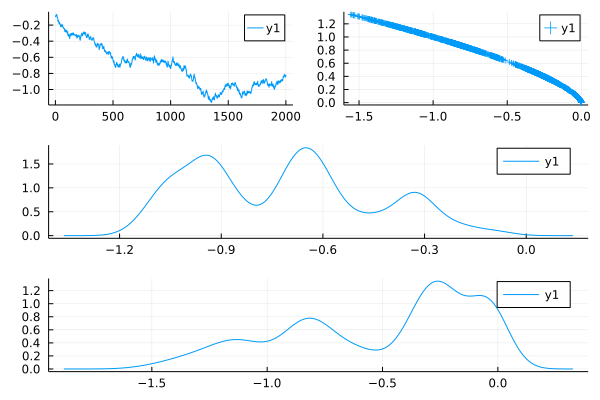

In [89]:
chart(t) = [t^3 t^2]

μ = 0
σ = 0.01
x₀ = -0.1
num_steps = 2000
steps = [x₀; rand(Normal(μ, σ), num_steps)]
walk = cumsum(steps)
walk_on_manifold = vcat(chart.(walk)...)

p1 = plot(walk)
p2 = scatter(walk_on_manifold[:, 1], walk_on_manifold[:, 2], markersize=3, markershape=:cross)
p3 = density(walk)
p4 = density(walk_on_manifold[:, 1])

l = @layout [
    a{0.5w} b{0.5w}
    c
    d
]
plot!(p1, p2, p3, p4, layout=l)


┌ Info: Saved animation to 
│   fn = /home/edmund/work_generic/practice_julia/tmp.gif
└ @ Plots /home/edmund/.julia/packages/Plots/J70Ph/src/animation.jl:114


Plots.AnimatedGif("/home/edmund/work_generic/practice_julia/tmp.gif")
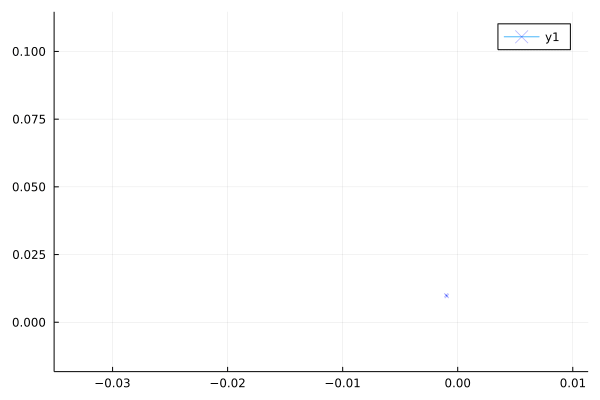

In [87]:
xmin, ymin = minimum(walk_on_manifold, dims=1)
xmax, ymax = maximum(walk_on_manifold, dims=1)
σ₁, σ₂ = std(walk_on_manifold, dims=1)
plt = plot(
    Tuple(walk_on_manifold[1, :]), 
    xlims=(xmin - σ₁, xmax + σ₁),
    ylims=(ymin - σ₂, ymax + σ₂), 
    alpha=0.7, 
    markershape=:xcross, 
    markersize=2, 
    markercolor="blue", 
    markeralpha=0.3, 
)

# build an animated gif by pushing new points to the plot, saving every 10th frame
@gif for i=2:num_steps
    push!(plt, walk_on_manifold[i, 1], walk_on_manifold[i, 2])
end every 10